In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AndhraP_Health_Insurance_Data.csv',parse_dates=["PREAUTH_DATE", "CLAIM_DATE", "SURGERY_DATE", "DISCHARGE_DATE"])
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5088\3153962856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('AndhraP_Health_Insurance_Data.csv',parse_dates=["PREAUTH_DATE", "CLAIM_DATE", "SURGERY_DATE", "DISCHARGE_DATE"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5088\3153962856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('AndhraP_Health_Insurance_Data.csv',parse_dates=["PREAUTH_DATE", "CLAIM_DATE", "SURGERY_DATE", "DISCHARGE_DATE"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5088\3153962856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format

,Sno,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-06-08,2013-07-09,NO,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-08,2013-09-09,NO,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,12500,2017-03-22,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-15,2013-10-18,NO,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-24,2013-09-27,NO,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-31,2013-02-10,NO,D


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sno               479688 non-null  int64         
 1   AGE               479688 non-null  int64         
 2   SEX               479688 non-null  object        
 3   CASTE_NAME        479688 non-null  object        
 4   CATEGORY_CODE     479688 non-null  object        
 5   CATEGORY_NAME     479688 non-null  object        
 6   SURGERY_CODE      479688 non-null  object        
 7   SURGERY           479688 non-null  object        
 8   VILLAGE           479688 non-null  object        
 9   MANDAL_NAME       479688 non-null  object        
 10  DISTRICT_NAME     479688 non-null  object        
 11  PREAUTH_DATE      479688 non-null  datetime64[ns]
 12  PREAUTH_AMT       479688 non-null  int64         
 13  CLAIM_DATE        479688 non-null  datetime64[ns]
 14  CLAI

In [4]:
df.isnull().mean()*100

Sno                 0.0
AGE                 0.0
SEX                 0.0
CASTE_NAME          0.0
CATEGORY_CODE       0.0
CATEGORY_NAME       0.0
SURGERY_CODE        0.0
SURGERY             0.0
VILLAGE             0.0
MANDAL_NAME         0.0
DISTRICT_NAME       0.0
PREAUTH_DATE        0.0
PREAUTH_AMT         0.0
CLAIM_DATE          0.0
CLAIM_AMOUNT        0.0
HOSP_NAME           0.0
HOSP_TYPE           0.0
HOSP_DISTRICT       0.0
SURGERY_DATE        0.0
DISCHARGE_DATE      0.0
Mortality Y / N     0.0
SRC_REGISTRATION    0.0
dtype: float64

In [5]:
df['SEX'] = df['SEX'].replace({'FEMALE': 'Female', 'MALE': 'Male'})

In [6]:
gender_count = df.groupby('SEX').agg(count=('SEX', 'size'))     
print(gender_count) 

                count
SEX                  
Female         178968
Female(Child)   14925
Male           260727
Male(Child)     25068


# Multivariant Analysis

In [ ]:
# Q1. 1.How do age, gender, and caste together influence the claim amount?

In [8]:
# Ensure the required columns are present
if all(col in df.columns for col in ['AGE', 'SEX', 'CASTE_NAME', 'CLAIM_AMOUNT']):
    # Group by AGE, SEX, and CASTE_NAME and calculate relevant statistics
    age_gender_caste_stats = (
        df.groupby(['AGE', 'SEX', 'CASTE_NAME'])['CLAIM_AMOUNT']
        .agg(['mean', 'sum', 'count'])
        .reset_index()
        .rename(columns={
            'mean': 'Mean Claim Amount',
            'sum': 'Total Claim Amount',
            'count': 'Number of Records'
        })
    )
    
    # Calculate the total claim amount across all groups
    total_claim_amount = df['CLAIM_AMOUNT'].sum()
    
    # Calculate the percentage of claim amounts for each group
    age_gender_caste_stats['% of Total Claim Amount'] = (
        (age_gender_caste_stats['Total Claim Amount'] / total_claim_amount) * 100
    )
    
    # Display the result
    print(age_gender_caste_stats)
else:
    raise KeyError("The required columns 'AGE', 'SEX', 'CASTE_NAME', and 'CLAIM_AMOUNT' are missing.")


      AGE            SEX  CASTE_NAME  Mean Claim Amount  Total Claim Amount  \
0       0  Female(Child)          BC       32028.145972           120457857   
1       0  Female(Child)  Minorities       32036.119540            13935712   
2       0  Female(Child)          OC       33506.597802            30491004   
3       0  Female(Child)      Others       30000.000000               90000   
4       0  Female(Child)          SC       32665.041032            49356877   
...   ...            ...         ...                ...                 ...   
1054   97           Male          OC       30000.000000               30000   
1055   99           Male          BC       30000.000000               30000   
1056  100           Male          OC       30000.000000               30000   
1057  101           Male          BC       30000.000000               30000   
1058  107         Female          OC       20000.000000               40000   

      Number of Records  % of Total Claim Amount  


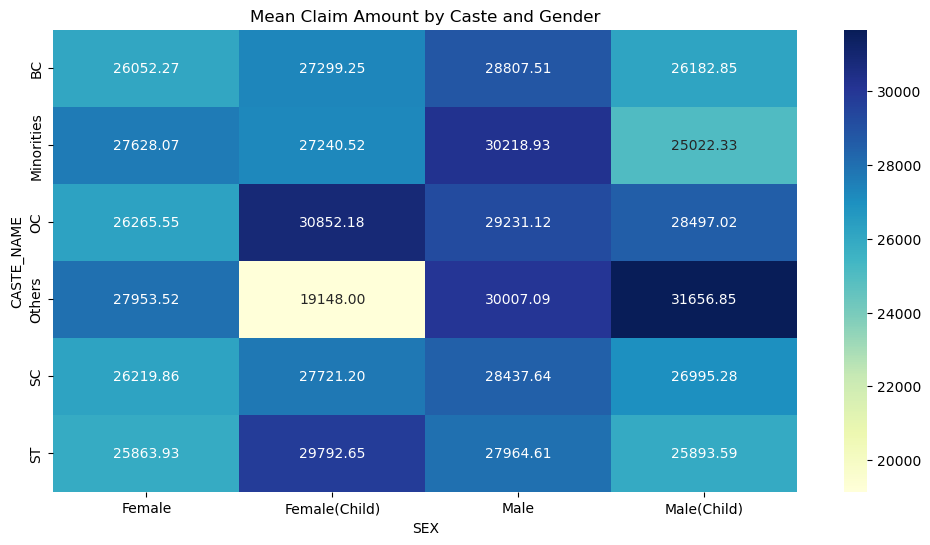

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of Mean Claim Amount
heatmap_data = age_gender_caste_stats.pivot_table(
    index='CASTE_NAME', 
    columns='SEX', 
    values='Mean Claim Amount', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Mean Claim Amount by Caste and Gender")
plt.show()


In [17]:
def analyze_claims_by_grouped_age(df, gender=None, caste=None, age_range=None):
    # Ensure required columns are present
    required_columns = ['AGE', 'SEX', 'CASTE_NAME', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    total_dataset_claim_amount = df['CLAIM_AMOUNT'].sum()
    
    # Filter by gender if provided
    if gender:
        df = df[df['SEX'] == gender]
    
    # Filter by caste if provided
    if caste:
        df = df[df['CASTE_NAME'] == caste]
    
    # Filter and group by the specified age range if provided
    if age_range:
        df = df[(df['AGE'] >= age_range[0]) & (df['AGE'] <= age_range[1])]
        age_label = f"{age_range[0]}-{age_range[1]}"
        df['AGE_GROUP'] = age_label  # Add a column for the grouped age range
    
    # Check if filtered DataFrame is not empty
    if df.empty:
        return "No records found for the given filters."
    
    # Group by AGE_GROUP and calculate required statistics
    stats = (
        df.groupby('AGE_GROUP')['CLAIM_AMOUNT']
        .agg(['mean', 'sum'])
        .reset_index()
        .rename(columns={
            'mean': 'Mean Claim Amount',
            'sum': 'Filtered Group Total Claim Amount'
        })
    )
    
    # Calculate the percentage of the filtered group's total claim amount out of the entire dataset
    stats['% of Total Dataset Claim Amount'] = (
        (stats['Filtered Group Total Claim Amount'] / total_dataset_claim_amount) * 100
    )
    
    # Drop 'Filtered Group Total Claim Amount' from the output
    stats = stats.drop(columns=['Filtered Group Total Claim Amount'])
    
    return stats


In [18]:
# Analyze claims for females of caste BC in the age range 21–40
result = analyze_claims_by_grouped_age(df, gender='Female', caste='BC', age_range=(21, 40))
print(result)


  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     21-40       23762.701663                         4.168549


In [19]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='OC', age_range=(41, 60))
print(result)


  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     41-60        30152.40846                         6.792937


In [20]:
df['CASTE_NAME'].unique()

array(['BC', 'OC', 'SC', 'Minorities', 'ST', 'Others'], dtype=object)

In [21]:
result = analyze_claims_by_grouped_age(df, gender='Female', caste='OC', age_range=(21, 40))
print(result)


  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     21-40       23191.447877                         1.465853


In [22]:
result = analyze_claims_by_grouped_age(df, gender='Female', caste='SC', age_range=(21, 40))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     21-40       24160.632437                         1.408353


In [23]:
result = analyze_claims_by_grouped_age(df, gender='Female', caste='ST', age_range=(21, 40))
print(result)


  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     21-40       24492.056012                         0.247239


In [24]:
result = analyze_claims_by_grouped_age(df, gender='Female', caste='Minorities', age_range=(21, 40))
print(result)


  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     21-40        23601.16603                         0.512255


In [26]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='BC', age_range=(41, 60))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     41-60       29769.150296                        13.252497


In [27]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='ST', age_range=(41, 60))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     41-60       27243.634216                         0.573856


In [28]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='Minorities', age_range=(41, 60))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     41-60       33951.505871                         1.918157


In [29]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='BC', age_range=(61, 80))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     61-80       31570.517938                         6.455038


In [30]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='OC', age_range=(61, 80))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     61-80       32136.776366                         4.537137


In [31]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='SC', age_range=(61, 80))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     61-80       31922.157206                         1.784974


In [32]:
result = analyze_claims_by_grouped_age(df, gender='Male', caste='ST', age_range=(61, 80))
print(result)

  AGE_GROUP  Mean Claim Amount  % of Total Dataset Claim Amount
0     61-80       30228.385231                         0.256149


In [ ]:
# Q2. 2. Does the hospital type affect mortality rates?

In [59]:
# Ensure 'Mortality Y / N' is mapped to 1 for 'Yes' and 0 for 'No'
df['Mortality Y / N'] = df['Mortality Y / N'].map({'Yes': 1, 'No': 0})

# Filter data for both hospital types (C and G)
df_filtered = df[df['HOSP_TYPE'].isin(['C', 'G'])]

# Calculate mortality statistics for each hospital type (C, G)
mortality_stats = df_filtered.groupby('HOSP_TYPE')['Mortality Y / N'].agg(
    Mortality_Count='sum',          # Count of mortality (1 for Yes)
    Total_Records='size'           # Total number of records for each HOSP_TYPE
)

# Calculate mortality rate (%) for each hospital type
mortality_stats['Mortality_Rate_%'] = (mortality_stats['Mortality_Count'] / mortality_stats['Total_Records']) * 100

# Add the number of survivors (Total - Mortality_Count)
mortality_stats['Survivor_Count'] = mortality_stats['Total_Records'] - mortality_stats['Mortality_Count']

# Display the results
print(mortality_stats)


           Mortality_Count  Total_Records  Mortality_Rate_%  Survivor_Count
HOSP_TYPE                                                                  
C                      0.0         369346               0.0        369346.0
G                      0.0         110342               0.0        110342.0


In [56]:
df['HOSP_TYPE'].unique()

array(['G', 'C'], dtype=object)

In [ ]:
# Q.3 What is the joint effect of surgery type(CATEGORY_NAME), age(AGE), and gender(SEX)
# on the preauthorization amount(PREAUTH_AMT)?

In [66]:
def analyze_joint_effect(df, category_name, age_group, sex):
    required_columns = ['CATEGORY_NAME', 'AGE', 'SEX', 'PREAUTH_AMT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    def age_grouping(age):
        if 0 <= age <= 20:
            return '0-20'
        elif 21 <= age <= 40:
            return '21-40'
        elif 41 <= age <= 60:
            return '41-60'
        elif 61 <= age <= 80:
            return '61-80'
        elif 81 <= age <= 100:
            return '81-100'
        else:
            return 'Other'
    
    df['Age Group'] = df['AGE'].apply(age_grouping)    
    df_filtered = df[(df['CATEGORY_NAME'] == category_name) &
                     (df['Age Group'] == age_group) &
                     (df['SEX'] == sex)]    
    if df_filtered.empty:
        return f"No records found for the specified parameters: {category_name}, {age_group}, {sex}"    
    preauth_avg = df_filtered.groupby(['CATEGORY_NAME', 'Age Group', 'SEX'])['PREAUTH_AMT'].mean().reset_index()    
    total_preauth = df_filtered['PREAUTH_AMT'].sum()
    preauth_avg['% of PREAUTH_AMT'] = (preauth_avg['PREAUTH_AMT'] / total_preauth) * 100
    return preauth_avg

In [67]:
result = analyze_joint_effect(df, 'OPHTHALMOLOGY  SURGERY', '21-40', 'Male')
print(result)

            CATEGORY_NAME Age Group   SEX   PREAUTH_AMT  % of PREAUTH_AMT
0  OPHTHALMOLOGY  SURGERY     21-40  Male  17776.361963          0.087642


In [68]:
result = analyze_joint_effect(df, 'NEPHROLOGY', '41-60', 'Female')
print(result)

  CATEGORY_NAME Age Group     SEX   PREAUTH_AMT  % of PREAUTH_AMT
0    NEPHROLOGY     41-60  Female  14400.230938          0.009142


In [ ]:
# Q4.4 How does the claim amount vary across hospitals type?

In [73]:
import pandas as pd

# Function to analyze CLAIM_AMOUNT by hospital type
def analyze_claim_amount_by_hosp_type(df):
    # Ensure required columns are present
    required_columns = ['HOSP_TYPE', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")
    
    # Calculate total CLAIM_AMOUNT by HOSP_TYPE
    claim_stats = df.groupby('HOSP_TYPE')['CLAIM_AMOUNT'].sum().reset_index()
    
    # Calculate total CLAIM_AMOUNT for all hospital types
    total_claim_amount = df['CLAIM_AMOUNT'].sum()
    
    # Calculate the percentage of CLAIM_AMOUNT for each HOSP_TYPE
    claim_stats['Percentage of CLAIM_AMOUNT'] = (claim_stats['CLAIM_AMOUNT'] / total_claim_amount) * 100
    
    return claim_stats

# Example usage:
result = analyze_claim_amount_by_hosp_type(df)
print(result)


  HOSP_TYPE  CLAIM_AMOUNT  Percentage of CLAIM_AMOUNT
0         C   10802191108                   81.437273
1         G    2462240217                   18.562727


<Figure size 1000x600 with 0 Axes>

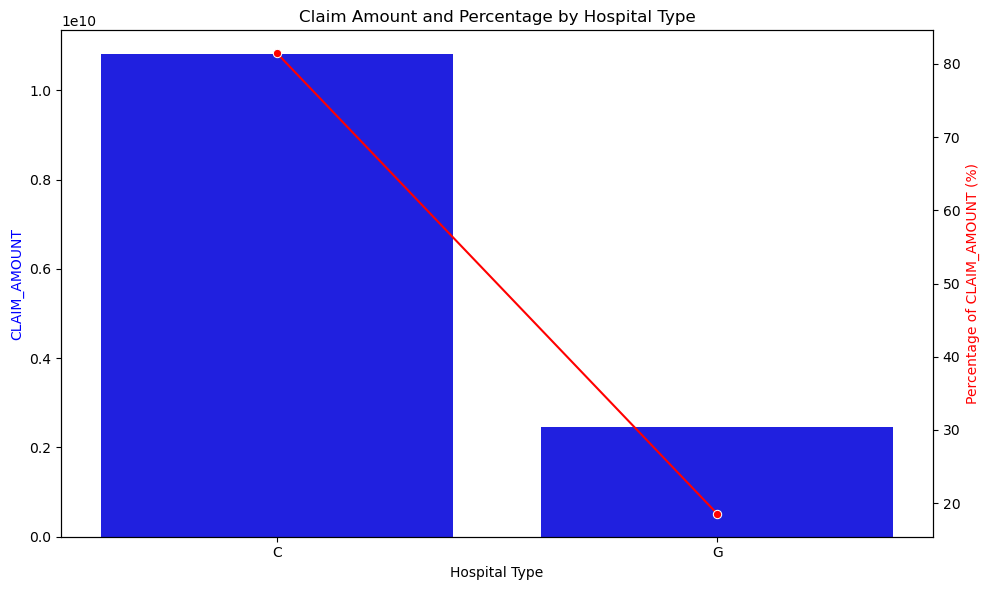

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_claim_amount_by_hosp_type(df):
    claim_stats = analyze_claim_amount_by_hosp_type(df)
    plt.figure(figsize=(10, 6))    
    fig, ax1 = plt.subplots(figsize=(10, 6))    
    sns.barplot(x='HOSP_TYPE', y='CLAIM_AMOUNT', data=claim_stats, ax=ax1, color='b')
    ax1.set_ylabel('CLAIM_AMOUNT', color='b')    
    ax2 = ax1.twinx()
    sns.lineplot(x='HOSP_TYPE', y='Percentage of CLAIM_AMOUNT', data=claim_stats, ax=ax2, color='r', marker='o')
    ax2.set_ylabel('Percentage of CLAIM_AMOUNT (%)', color='r')    
    plt.title('Claim Amount and Percentage by Hospital Type')
    ax1.set_xlabel('Hospital Type')    
    plt.tight_layout()
    plt.show()
plot_claim_amount_by_hosp_type(df)

In [76]:
# Q.5 Are there patterns between caste, surgery code, and hospital type in determining the mortality rate?

In [79]:
import pandas as pd

def analyze_patterns_in_mortality(df):
    # Ensure required columns are present
    required_columns = ['CASTE', 'CATEGORY_NAME', 'HOSP_TYPE', 'Mortality Y / N']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")
    
    # Map mortality values (if needed, to ensure consistent 1/0)
    df['Mortality Y / N'] = df['Mortality Y / N'].map({'Yes': 1, 'No': 0})
    
    # Group by caste, surgery code, and hospital type and calculate mortality rate
    mortality_stats = (
        df.groupby(['CASTE', 'CATEGORY_NAME', 'HOSP_TYPE'])['Mortality Y / N']
        .agg(['sum', 'count'])  # sum gives the number of deaths, count gives the total number of cases
        .reset_index()
    )
    
    # Calculate mortality rate (deaths / total cases * 100)
    mortality_stats['Mortality Rate (%)'] = (
        (mortality_stats['sum'] / mortality_stats['count']) * 100
    )
    
    # Rename columns for clarity
    mortality_stats = mortality_stats.rename(columns={'sum': 'Mortality Count', 'count': 'Total Cases'})
    
    return mortality_stats

# Example usage:
result = analyze_patterns_in_mortality(df)
print(result)


KeyError: "The required columns ['CASTE', 'CATEGORY_NAME', 'HOSP_TYPE', 'Mortality Y / N'] are missing."

In [ ]:
# Q.6 How do claim date, preauthorization amount, and surgery date relate to mortality?

In [87]:
import pandas as pd
def analyze_mortality_by_claim_and_surgery(df):
    required_columns = ['PREAUTH_AMT', 'SURGERY_DATE', 'Mortality Y / N']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    df['Mortality Y / N'] = df['Mortality Y / N'].map({'Yes': 1, 'No': 0})    
#     df['CLAIM_YEAR'] = pd.to_datetime(df['CLAIM_DATE']).dt.year
    df['SURGERY_YEAR'] = pd.to_datetime(df['SURGERY_DATE']).dt.year    
    df_grouped = df.groupby(['SURGERY_YEAR']).agg(
        average_preauth_amt=('PREAUTH_AMT', 'mean'),
        mortality_count=('Mortality Y / N', 'sum'),
        total_count=('Mortality Y / N', 'size')
    ).reset_index()    
    df_grouped['Mortality Rate (%)'] = (df_grouped['mortality_count'] / df_grouped['total_count']) * 100
    
    return df_grouped[['SURGERY_YEAR', 'average_preauth_amt', 'mortality_count', 'Mortality Rate (%)']]

result = analyze_mortality_by_claim_and_surgery(df)
print(result)

   SURGERY_YEAR  average_preauth_amt  mortality_count  Mortality Rate (%)
0          2013         12500.000000              0.0                 0.0
1          2014         61391.843750              0.0                 0.0
2          2015         35884.606452              0.0                 0.0
3          2016         32237.877387              0.0                 0.0
4          2017         29581.467023              0.0                 0.0


In [89]:
# final 

def analyze_mortality_by_claim_and_surgery(df):
    # Ensure required columns are present
    required_columns = ['PREAUTH_AMT', 'SURGERY_DATE', 'Mortality Y / N']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    
    # Convert Mortality Y/N to binary (Yes -> 1, No -> 0)
    df['Mortality Y / N'] = df['Mortality Y / N'].map({'Yes': 1, 'No': 0})    

    # Extract year from SURGERY_DATE
    df['SURGERY_YEAR'] = pd.to_datetime(df['SURGERY_DATE']).dt.year    

    # Group by SURGERY_YEAR and calculate the average PREAUTH_AMT, mortality count, and total count
    df_grouped = df.groupby(['SURGERY_YEAR']).agg(
        average_preauth_amt=('PREAUTH_AMT', 'mean'),
        mortality_count=('Mortality Y / N', 'sum'),
        total_count=('Mortality Y / N', 'size')
    ).reset_index()    

    # Calculate the percentage of average PREAUTH_AMT for each year relative to the total PREAUTH_AMT
    total_preauth_amt = df['PREAUTH_AMT'].sum()
    df_grouped['Percentage of PREAUTH_AMT (%)'] = (df_grouped['average_preauth_amt'] / total_preauth_amt) * 100
    
    # Return the grouped data with SURGERY_YEAR, average_preauth_amt, mortality_count, and percentage of PREAUTH_AMT
    return df_grouped[['SURGERY_YEAR', 'average_preauth_amt', 'mortality_count', 'Percentage of PREAUTH_AMT (%)']]

# Example usage:
result = analyze_mortality_by_claim_and_surgery(df)
print(result)


   SURGERY_YEAR  average_preauth_amt  mortality_count  \
0          2013         12500.000000              0.0   
1          2014         61391.843750              0.0   
2          2015         35884.606452              0.0   
3          2016         32237.877387              0.0   
4          2017         29581.467023              0.0   

   Percentage of PREAUTH_AMT (%)  
0                       0.000086  
1                       0.000421  
2                       0.000246  
3                       0.000221  
4                       0.000203  


In [90]:
# Q 7 What is the combined impact of age, gender, and SRC_REGISTRATION on claim amount? 

In [91]:
df['SRC_REGISTRATION'].unique()

array(['D', 'P', 'MC', 'CMO'], dtype=object)

In [96]:
def analyze_claim_amount(df, age_group, sex, src_registration):
    required_columns = ['AGE', 'SEX', 'SRC_REGISTRATION', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    age_bins = [0, 20, 40, 60, 80, 100] 
    age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
    df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)    
    filtered_df = df[(df['AGE_GROUP'] == age_group) & (df['SEX'] == sex) & (df['SRC_REGISTRATION'] == src_registration)]    
    claim_amount_stats = filtered_df.groupby(['AGE_GROUP', 'SEX', 'SRC_REGISTRATION'])['CLAIM_AMOUNT'].sum().reset_index()    
    total_claim_amount = claim_amount_stats['CLAIM_AMOUNT'].sum()
    claim_amount_stats['CLAIM_AMOUNT (%)'] = (claim_amount_stats['CLAIM_AMOUNT'] / total_claim_amount) * 100    
    return claim_amount_stats

In [97]:
age_group = '21-40' 
sex = 'Male'  
src_registration = 'D'  
result = analyze_claim_amount(df, age_group, sex, src_registration)
print(result)

  AGE_GROUP   SEX SRC_REGISTRATION  CLAIM_AMOUNT  CLAIM_AMOUNT (%)
0      0-20  Male                D             0               0.0
1     21-40  Male                D    1705239423             100.0
2     41-60  Male                D             0               0.0
3     61-80  Male                D             0               0.0
4    81-100  Male                D             0               0.0


In [98]:
# Q 8 How does the combination of hospital district, hospital type, and surgery type influence the claim amount?

In [99]:
df['CATEGORY_NAME'].unique()

array(['NEPHROLOGY', 'CARDIAC AND CARDIOTHORACIC SURGERY', 'CARDIOLOGY',
       'COCHLEAR IMPLANT SURGERY', 'ORTHOPEDIC  SURGERY AND PROCEDURES',
       'MEDICAL ONCOLOGY', 'PEDIATRICS',
       'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'RADIATION ONCOLOGY',
       'GENITO URINARY SURGERIES', 'NEUROLOGY', 'POLY TRAUMA',
       'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',
       'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',
       'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
       'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
       'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES',
       'INFECTIOUS DISEASES'], dtype=object)

In [103]:
def analyze_claim_amount_by_factors(df, district_name, hosp_type, category_name):
    required_columns = ['DISTRICT_NAME', 'HOSP_TYPE', 'CATEGORY_NAME', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    filtered_df = df[(df['DISTRICT_NAME'] == district_name) & 
                     (df['HOSP_TYPE'] == hosp_type) & 
                     (df['CATEGORY_NAME'] == category_name)]    
    claim_amount_stats = filtered_df.groupby(['DISTRICT_NAME', 'HOSP_TYPE', 'CATEGORY_NAME'])['CLAIM_AMOUNT'].sum().reset_index()    
    total_claim_amount = claim_amount_stats['CLAIM_AMOUNT'].sum()    
    claim_amount_stats['CLAIM_AMOUNT (%)'] = (claim_amount_stats['CLAIM_AMOUNT'] / total_claim_amount) * 100
    return claim_amount_stats

In [105]:
district_name = 'Vizianagaram'  
hosp_type = 'C' 
category_name = 'NEPHROLOGY'  
result = analyze_claim_amount_by_factors(df, district_name, hosp_type, category_name)
print(result)


  DISTRICT_NAME HOSP_TYPE CATEGORY_NAME  CLAIM_AMOUNT  CLAIM_AMOUNT (%)
0  Vizianagaram         C    NEPHROLOGY      22429756             100.0


In [114]:
def analyze_claim_amount_by_factors(df, district_name, hosp_type, category_name):
    required_columns = ['DISTRICT_NAME', 'HOSP_TYPE', 'CATEGORY_NAME', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    filtered_df = df[(df['DISTRICT_NAME'] == district_name) & 
                     (df['HOSP_TYPE'] == hosp_type) & 
                     (df['CATEGORY_NAME'] == category_name)]    
    claim_amount_stats = filtered_df.groupby(['DISTRICT_NAME', 'HOSP_TYPE', 'CATEGORY_NAME'])['CLAIM_AMOUNT'].sum().reset_index()    
    total_claim_amount = claim_amount_stats['CLAIM_AMOUNT'].sum()    
    claim_amount_stats['CLAIM_AMOUNT(%)'] = (claim_amount_stats['CLAIM_AMOUNT'] / total_claim_amount) * 100
    return claim_amount_stats

In [115]:
district_name = 'Vizianagaram'  
hosp_type = 'C' 
category_name = 'NEPHROLOGY'  
result = analyze_claim_amount_by_factors(df, district_name, hosp_type, category_name)
print(result)


  DISTRICT_NAME HOSP_TYPE CATEGORY_NAME  CLAIM_AMOUNT  CLAIM_AMOUNT(%)
0  Vizianagaram         C    NEPHROLOGY      22429756            100.0


In [116]:
# Q.9 Are there significant differences in claim amounts based on caste ?

In [120]:
def analyze_claim_amount_by_caste(df):
    # Ensure the required columns are present
    required_columns = ['CASTE_NAME', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    caste_claim_stats = df.groupby('CASTE_NAME').agg(
        total_claim_amount=('CLAIM_AMOUNT', 'sum')
    ).reset_index()    
    grand_total_claim_amount = caste_claim_stats['total_claim_amount'].sum()    
    caste_claim_stats['CLAIM_AMOUNT (%)'] = (caste_claim_stats['total_claim_amount'] / grand_total_claim_amount) * 100
    return caste_claim_stats
result = analyze_claim_amount_by_caste(df)
print(result)

   CASTE_NAME  total_claim_amount  CLAIM_AMOUNT (%)
0          BC          6721286111         50.671498
1  Minorities           859866110          6.482495
2          OC          3226762404         24.326429
3      Others            10162908          0.076618
4          SC          2095633058         15.798891
5          ST           350720734          2.644069


In [138]:
# Q.10 Are there significant differences in claim amounts based on SURGERY_YEAR ?

In [139]:
def analyze_highest_claim_by_surgery_year(df):
    required_columns = ['SURGERY_DATE', 'CLAIM_AMOUNT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")    
    df['SURGERY_YEAR'] = pd.to_datetime(df['SURGERY_DATE']).dt.year    
    surgery_year_stats = df.groupby('SURGERY_YEAR').agg(
        total_claim_amount=('CLAIM_AMOUNT', 'sum')
    ).reset_index()    
    grand_total_claim_amount = surgery_year_stats['total_claim_amount'].sum()
    surgery_year_stats['CLAIM_AMOUNT (%)'] = (
        (surgery_year_stats['total_claim_amount'] / grand_total_claim_amount) * 100
    )    
    max_claim_row = surgery_year_stats.loc[surgery_year_stats['total_claim_amount'].idxmax()]
    return surgery_year_stats, max_claim_row
surgery_year_stats, max_claim_row = analyze_highest_claim_by_surgery_year(df)
print(surgery_year_stats)

   SURGERY_YEAR  total_claim_amount  CLAIM_AMOUNT (%)
0          2013               77500          0.000584
1          2014             3669836          0.027667
2          2015            28875079          0.217688
3          2016          4269690288         32.189019
4          2017          8962118622         67.565042


In [ ]:
# Q. 11 How do village, mandal, and district jointly impact claim frequency?

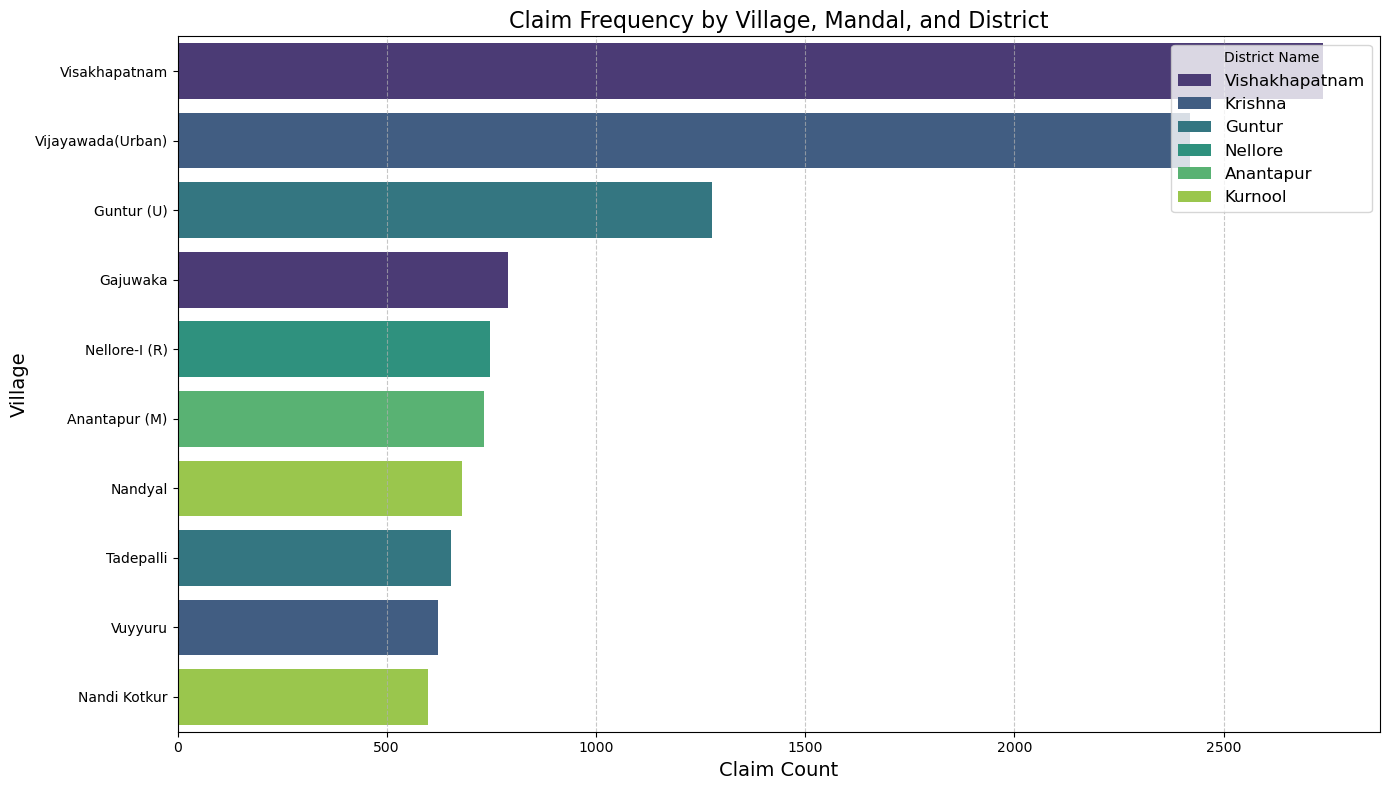

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the claim frequency data
def plot_claim_frequency(result):
    # Sort data by claim count for better visualization
    result = result.sort_values(by='claim_count', ascending=False).head(10)  # Top 10 for clarity

    # Bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=result,
        y='VILLAGE', 
        x='claim_count', 
        hue='DISTRICT_NAME', 
        dodge=False,
        palette="viridis"
    )
    
    # Add labels and title
    plt.title('Claim Frequency by Village, Mandal, and District', fontsize=16)
    plt.xlabel('Claim Count', fontsize=14)
    plt.ylabel('Village', fontsize=14)
    plt.legend(title='District Name', loc='upper right', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function
plot_claim_frequency(result)


In [ ]:
# Q12 What is the relationship between preauthorization amount, claim amount, and surgery type?

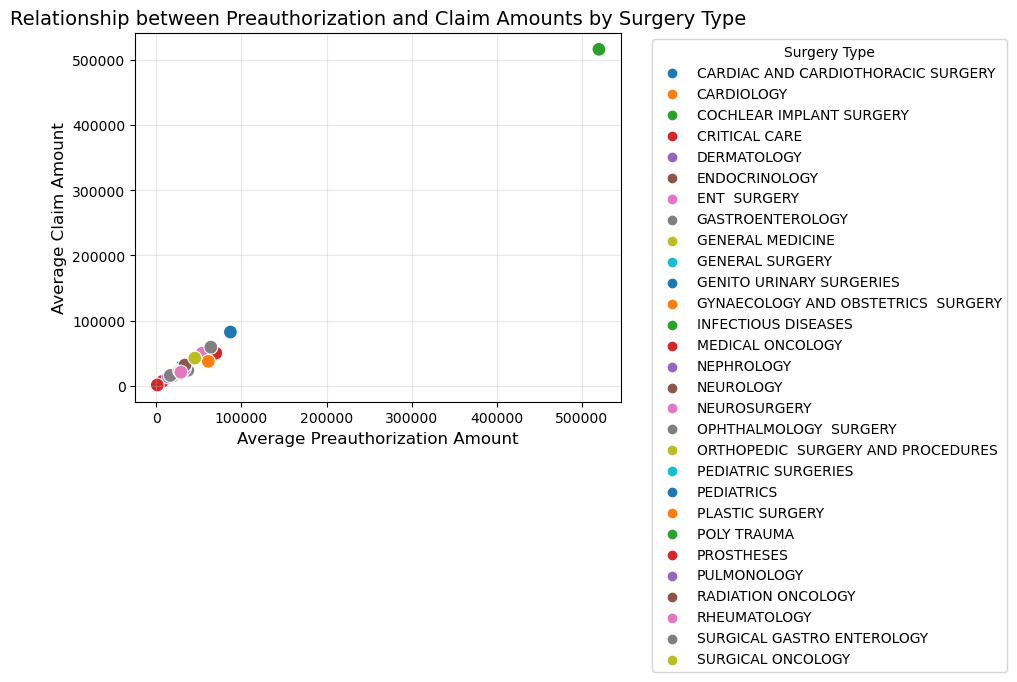

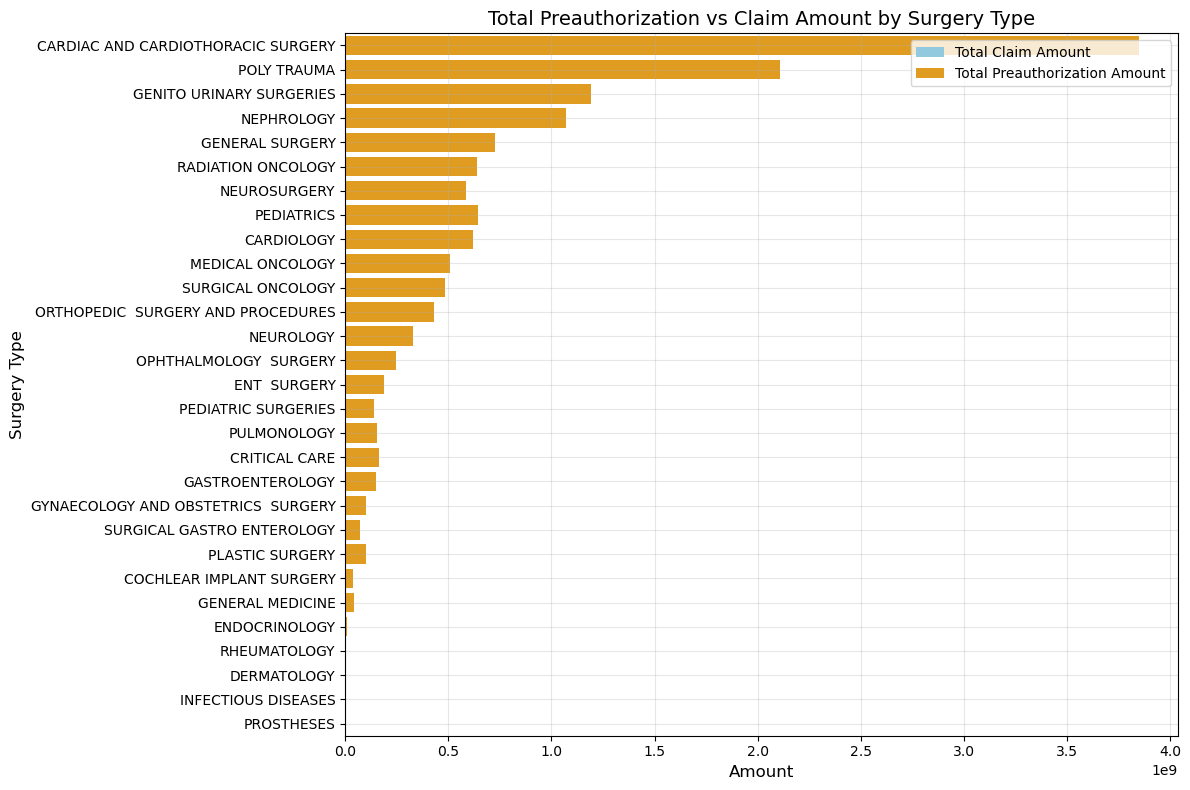

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_relationship(df):
    required_columns = ['PREAUTH_AMT', 'CLAIM_AMOUNT', 'CATEGORY_NAME']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")

    # Group by surgery type and calculate mean and total amounts
    grouped_data = df.groupby('CATEGORY_NAME').agg(
        average_preauth_amt=('PREAUTH_AMT', 'mean'),
        total_preauth_amt=('PREAUTH_AMT', 'sum'),
        average_claim_amt=('CLAIM_AMOUNT', 'mean'),
        total_claim_amt=('CLAIM_AMOUNT', 'sum')
    ).reset_index()

    return grouped_data

def visualize_relationship(grouped_data):
    # Scatter plot to compare averages
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=grouped_data,
        x='average_preauth_amt',
        y='average_claim_amt',
        hue='CATEGORY_NAME',
        palette='tab10',
        s=100
    )
    plt.title('Relationship between Preauthorization and Claim Amounts by Surgery Type', fontsize=14)
    plt.xlabel('Average Preauthorization Amount', fontsize=12)
    plt.ylabel('Average Claim Amount', fontsize=12)
    plt.legend(title='Surgery Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Bar plot to show total amounts by surgery type
    grouped_data_sorted = grouped_data.sort_values(by='total_claim_amt', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=grouped_data_sorted,
        x='total_claim_amt',
        y='CATEGORY_NAME',
        label='Total Claim Amount',
        color='skyblue'
    )
    sns.barplot(
        data=grouped_data_sorted,
        x='total_preauth_amt',
        y='CATEGORY_NAME',
        label='Total Preauthorization Amount',
        color='orange'
    )
    plt.title('Total Preauthorization vs Claim Amount by Surgery Type', fontsize=14)
    plt.xlabel('Amount', fontsize=12)
    plt.ylabel('Surgery Type', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage
grouped_data = analyze_relationship(df)
visualize_relationship(grouped_data)


In [146]:
# Q. 13 How does age group, gender, and surgery type affect preauthorization amounts?

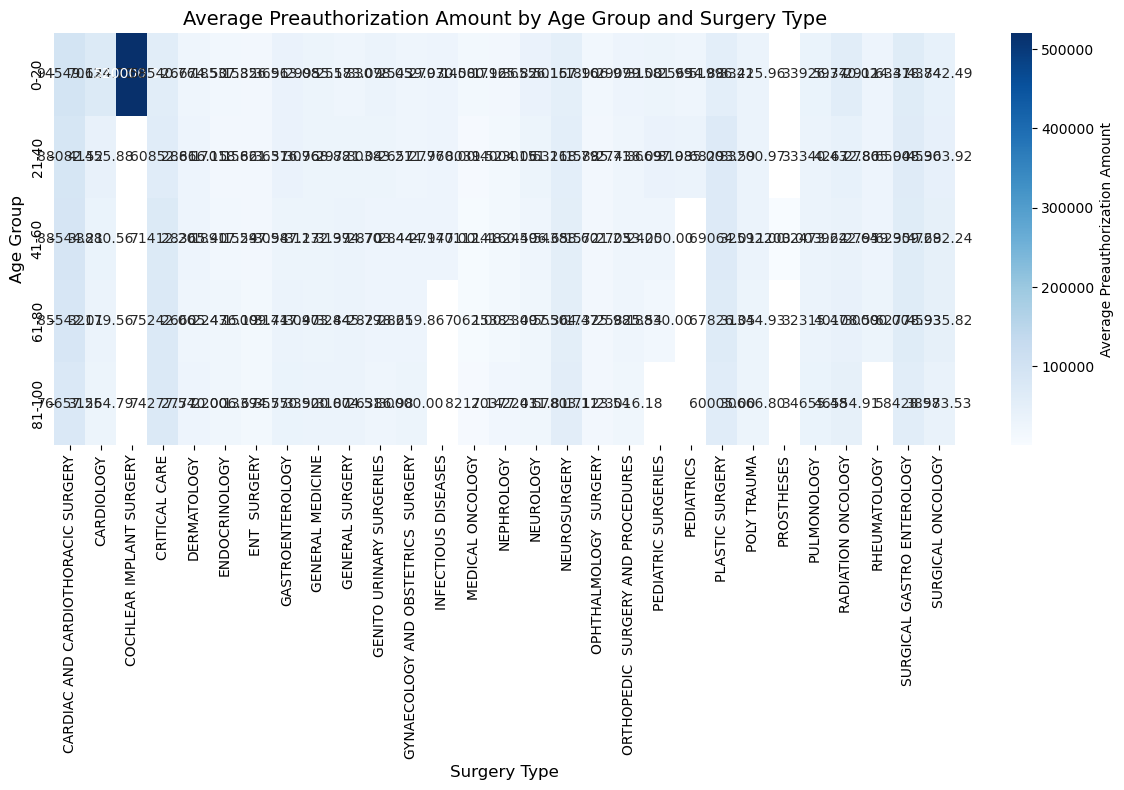

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty s

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty sl

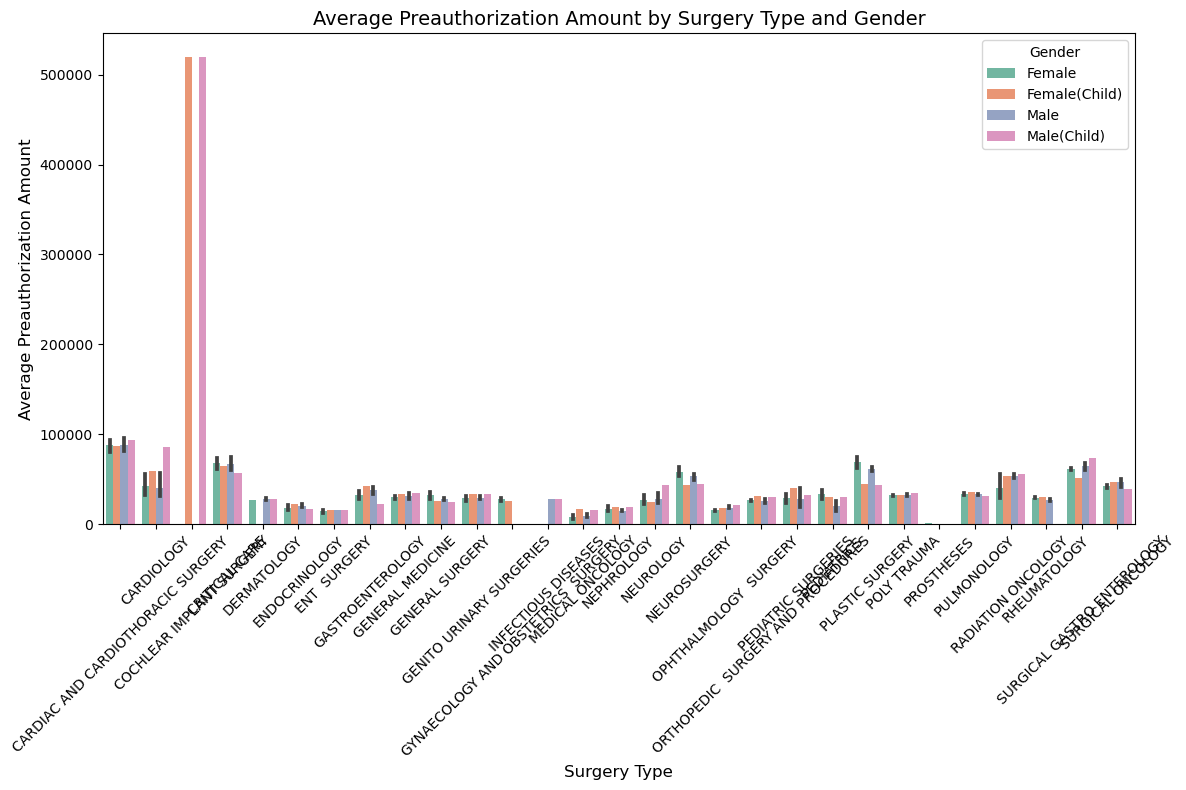

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_preauth_amount(df):
    required_columns = ['AGE', 'SEX', 'CATEGORY_NAME', 'PREAUTH_AMT']
    if not all(col in df.columns for col in required_columns):
        raise KeyError(f"The required columns {required_columns} are missing.")

    # Define age groups
    age_bins = [0, 20, 40, 60, 80, 100]
    age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
    df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

    # Group by age group, gender, and surgery type
    grouped_data = df.groupby(['AGE_GROUP', 'SEX', 'CATEGORY_NAME']).agg(
        average_preauth_amt=('PREAUTH_AMT', 'mean'),
        total_preauth_amt=('PREAUTH_AMT', 'sum'),
        count=('PREAUTH_AMT', 'size')
    ).reset_index()

    return grouped_data

def visualize_preauth_amount(grouped_data):
    # Pivot the data for heatmap
    pivot_data = grouped_data.pivot_table(
        index='AGE_GROUP',
        columns='CATEGORY_NAME',
        values='average_preauth_amt',
        aggfunc='mean'
    )

    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Average Preauthorization Amount'})
    plt.title('Average Preauthorization Amount by Age Group and Surgery Type', fontsize=14)
    plt.xlabel('Surgery Type', fontsize=12)
    plt.ylabel('Age Group', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Bar plot for gender comparison
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=grouped_data,
        x='CATEGORY_NAME',
        y='average_preauth_amt',
        hue='SEX',
        palette='Set2'
    )
    plt.title('Average Preauthorization Amount by Surgery Type and Gender', fontsize=14)
    plt.xlabel('Surgery Type', fontsize=12)
    plt.ylabel('Average Preauthorization Amount', fontsize=12)
    plt.legend(title='Gender')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
grouped_data = analyze_preauth_amount(df)
visualize_preauth_amount(grouped_data)
